<a href="https://colab.research.google.com/github/ericriveraisme/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Eric_Rivera_Copy_of_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import math

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def find_mean(data):
  sum = 0
  for value in data:
    sum += value
  return (sum/len(data))
  
def find_var(data):
  mean = sales_mean(data)
  sumsqrd = 0
  for value in data:
    sumsqrd += ((value - mean)**2)
  return (sumsqrd/len(data))

def find_std(data):
  var = find_var(data)
  return var**0.5

In [170]:
print("\nMean of this week's sales\n",find_mean(sales))
print("\nVariation of this week's sales\n",find_var(sales))
print("\nStandard Deviation of this week's sales\n",find_std(sales))


Mean of this week's sales
 3052.714285714286

Variation of this week's sales
 183761.06122448976

Standard Deviation of this week's sales
 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [171]:
cust_visit = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, cust_visit)

print("\nThis week's covariance between customers and sales:\n",covariance)


This week's covariance between customers and sales:
 [[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
sales_std = find_std(sales)
cust_std = find_std(cust_visit)

In [0]:
#corrcoef5 = np.dot(covariance, 1/(sales_std * cust_std))
#corrcoef5

In [0]:
#corrcoef6 = covariance / (sales_std**2 * cust_std**2)
#corrcoef6

In [0]:
denom_matrix = np.array([[sales_std **2, sales_std * cust_std],
                     [sales_std * cust_std, cust_std ** 2]])

In [176]:
denom_matrix

array([[183761.06122449,   6769.62026512],
       [  6769.62026512,    249.3877551 ]])

In [178]:
corrcoef = np.divide(denom_matrix, covariance)

print(corrcoef)

[[0.85714286 0.89022913]
 [0.89022913 0.85714286]]


In [96]:
np.corrcoef(sales, cust_visit)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [97]:
!wget https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

--2019-10-21 18:27:40--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.04s   

2019-10-21 18:27:40 (3.63 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [0]:
df = pd.read_csv("titanic_clean.csv", index_col=0)

In [103]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [104]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [105]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Another name is perpendicular vectors.

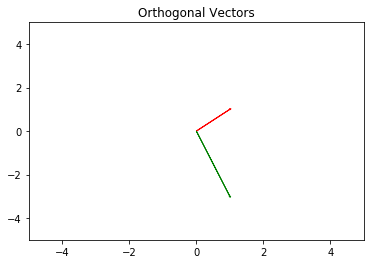

In [119]:
vector_1 = [1, 1]
vector_2 = [1, -3]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

These two vectors are not orthogonal, they are linearly independent. They point in seperate directions from the same starting point.

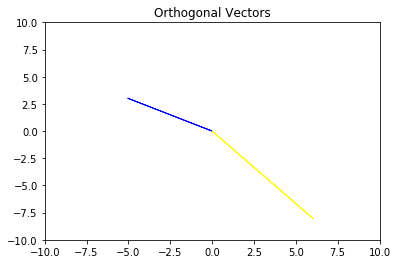

In [123]:
vector_3 = [-5,3,7]
vector_4 = [6,-8,2]

plt.arrow(0,0, vector_3[0], vector_3[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vector_4[0], vector_4[1],head_width=.05, head_length=0.05, color ='yellow')
plt.xlim(-10,10)          
plt.ylim(-10,10)
plt.title("Orthogonal Vectors")
plt.show()

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2,-15,6,20]
c_2 = [ii*2 for ii in c]

In [146]:
np.linalg.norm(c_2)

51.57518783291051

In [151]:
print(np.dot(c,c))

665


In [0]:
c_T = np.transpose(c)

In [149]:
print(np.matmul(c_T,c))

665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

1.
$$\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

2.

$$\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix},\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix},\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$$


\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])

f_hat = f / (f**2).sum()**0.5

In [157]:
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

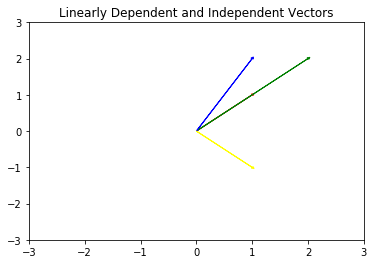

In [158]:
vector_5 = [1,1]
vector_6 = [2,2]
vector_7 = [1,2]
vector_8 = [1,-1]

plt.arrow(0,0, vector_5[0], vector_5[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_6[0], vector_6[1],head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, vector_7[0], vector_7[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vector_8[0], vector_8[1],head_width=.05, head_length=0.05, color ='yellow')
plt.xlim(-3,3)          
plt.ylim(-3,3)
plt.title("Linearly Dependent and Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

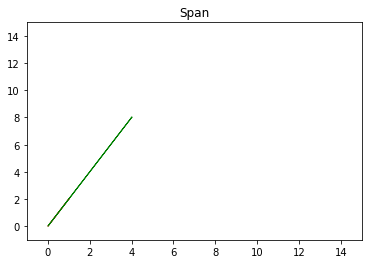

In [159]:
g = [1,2]
h = [4,8]

plt.arrow(0,0, g[0], g[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, h[0], h[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,15)          
plt.ylim(-1,15)
plt.title("Span")
plt.show()

In [161]:
test = np.matrix('1 2; 4 8')

print(np.linalg.matrix_rank(test))

1


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
from mpl_toolkits.mplot3d import Axes3D

#lmn_vectors = np.matrix('1 2 3; -1 0 7; 4 8 2')

In [166]:
#lmn_vectors

matrix([[ 1,  2,  3],
        [-1,  0,  7],
        [ 4,  8,  2]])

States expected 6 and got one, needs to add full array.

In [0]:
vectors = np.array([[0, 0, 0, 1, 2, 3],
                   [0, 0, 0, -1, 0, 7],
                   [0, 0, 0, 4, 8, 2]])

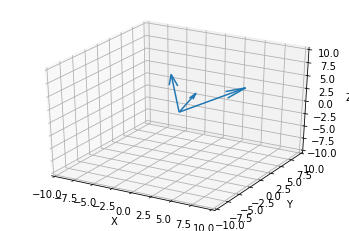

In [183]:
X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

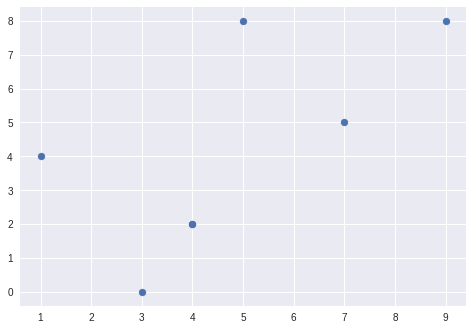

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()